In [532]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline  

from utils.archiver import *

In [533]:
def plot_cube(cube, title="", cmap="jet", savefile=None, log=False):
    N = cube.shape[-1]
    n = int(np.ceil(np.sqrt(N)))
    m = int(np.ceil(N / float(n)))
    assert N <= n*m
    assert n <= 8
    
    vmin = np.min(cube)
    vmax = np.max(cube)
    
    norm = None
    if log:
        norm = LogNorm(vmin=vmin, vmax=vmax)
    
    plt.figure(figsize=(16,16))
    plt.title(title)
    for i in xrange(1,N):
        plt.subplot(n,m,i)
        plt.imshow(cube[:,:,i], interpolation="nearest",
                   cmap=cmap, 
                   vmin=vmin,
                   vmax=vmax,
                   norm=norm,)
        plt.colorbar()
    if savefile:
        plt.savefig(save)

In [570]:
unarch = Unarchiver('/home/epz/scratch/plane_refine.data')
NXY = 16+1
NT = 8+1
A = 4
I = 10+1


In [572]:
primals = unarch.primals
duals = unarch.duals
residuals = duals[:, 1:, :]
basis = unarch.added_bases
bellman = unarch.residuals
print primals.shape
assert 3 == primals.ndim
assert NXY * NXY * NT + 1 == primals.shape[0], "{} != {}".format( NXY * NXY * NT + 1, primals.shape[0])
assert A == primals.shape[1]
assert I == primals.shape[2]

(2602, 4, 11)


(17, 17, 9)


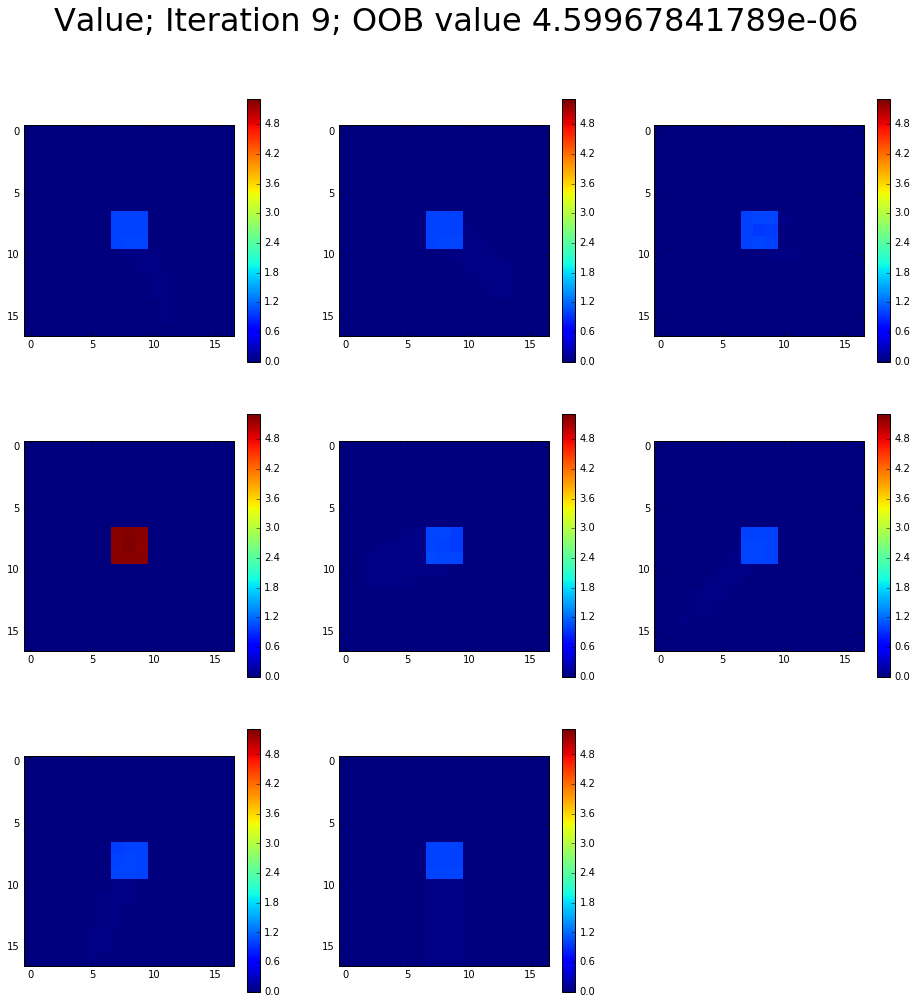

In [558]:
iter_slice = 9

value = primals[:, 0, iter_slice]
oob_value = value[-1]
value = np.reshape(value[:-1], (NXY, NXY, NT))
print(value.shape)
plot_cube(value)
plt.suptitle('Value; Iteration {}; OOB value {}'.format(iter_slice, oob_value), fontsize=32)


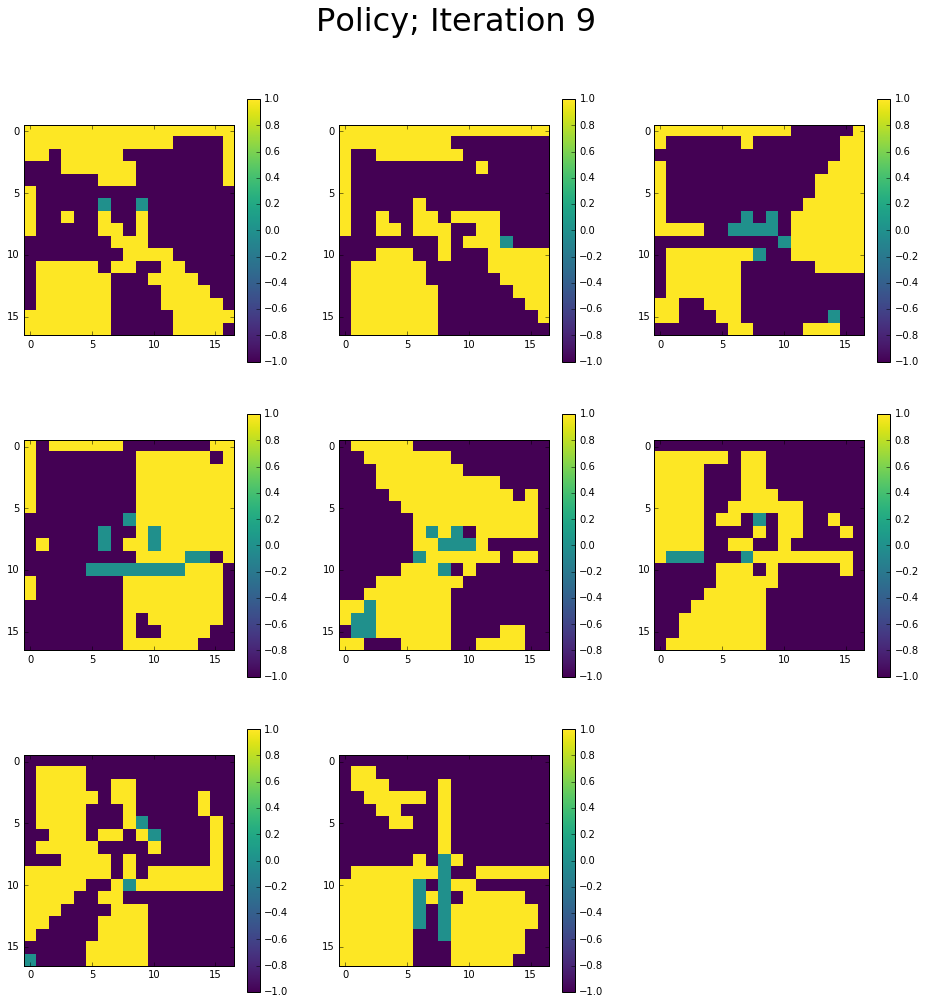

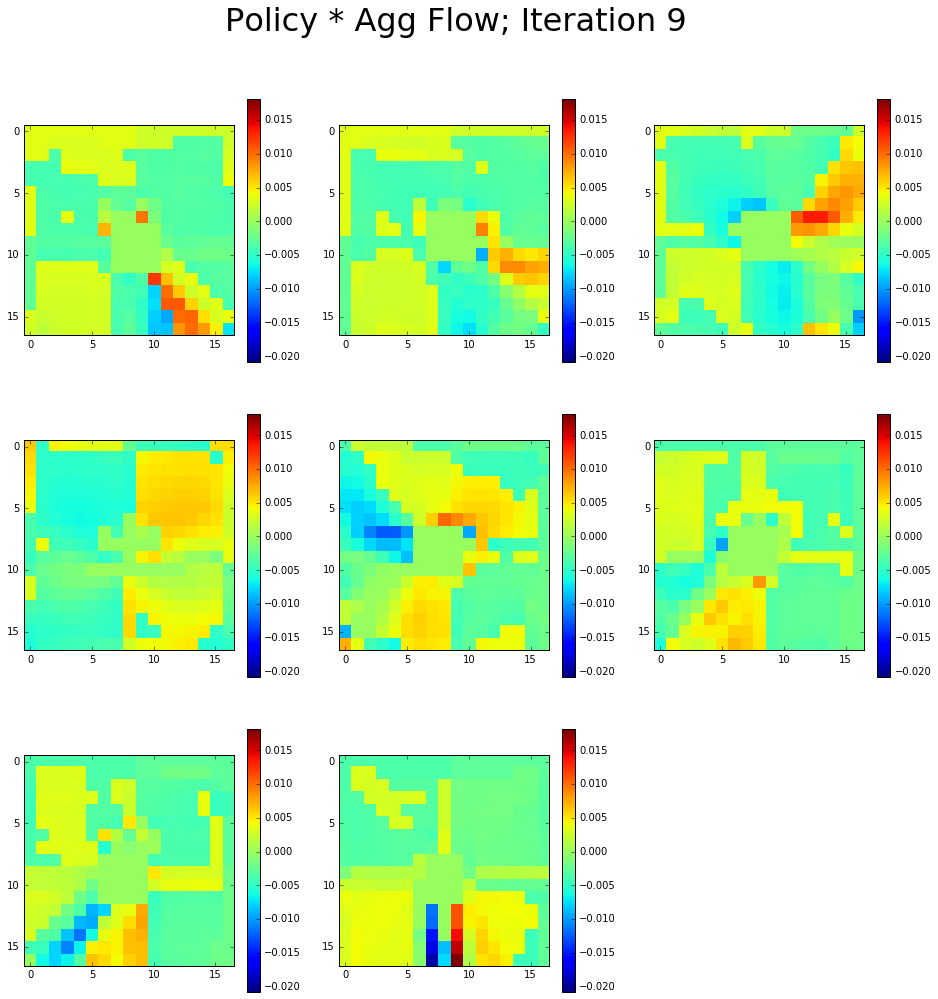

In [584]:
iter_slice = 9
flows = primals[:-1, 1:, iter_slice]
pi = np.reshape(np.argmax(flows,axis=1), (NXY,NXY,NT)) - 1
agg_flow = np.reshape(np.sum(flows,axis=1), (NXY,NXY,NT))

plt.figure()
plot_cube(pi, cmap='viridis')
plt.suptitle('Policy; Iteration {}'.format(iter_slice), fontsize=32)

plt.figure()
plot_cube(pi * agg_flow, cmap='jet')
plt.suptitle('Policy * Agg Flow; Iteration {}'.format(iter_slice), fontsize=32)

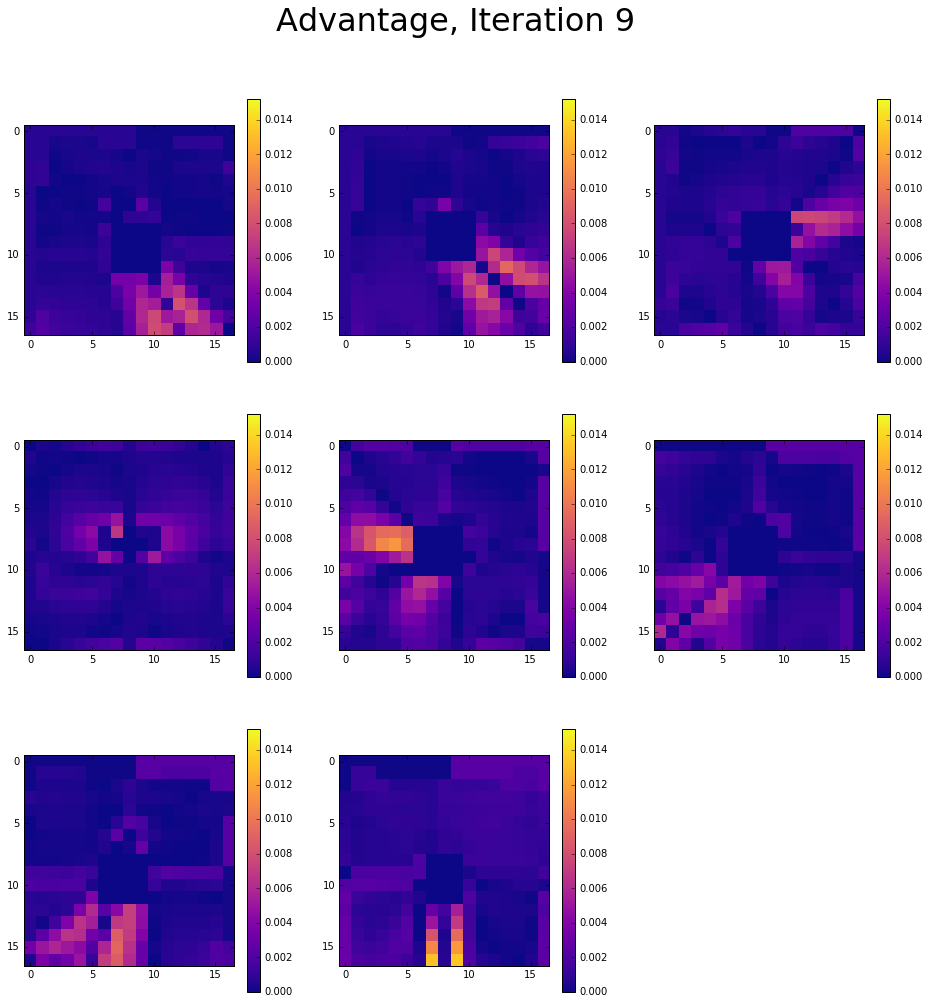

In [566]:
iter_slice=9
plt.figure()
flows = primals[:-1, 1:, iter_slice]
sorted_flow = np.sort(flows,axis=1)
adv = sorted_flow[:,-1] - sorted_flow[:,-2]
plot_cube(np.reshape(adv, (NXY,NXY,NT)), cmap='plasma')
plt.suptitle('Advantage, Iteration {}'.format(iter_slice), fontsize=32)


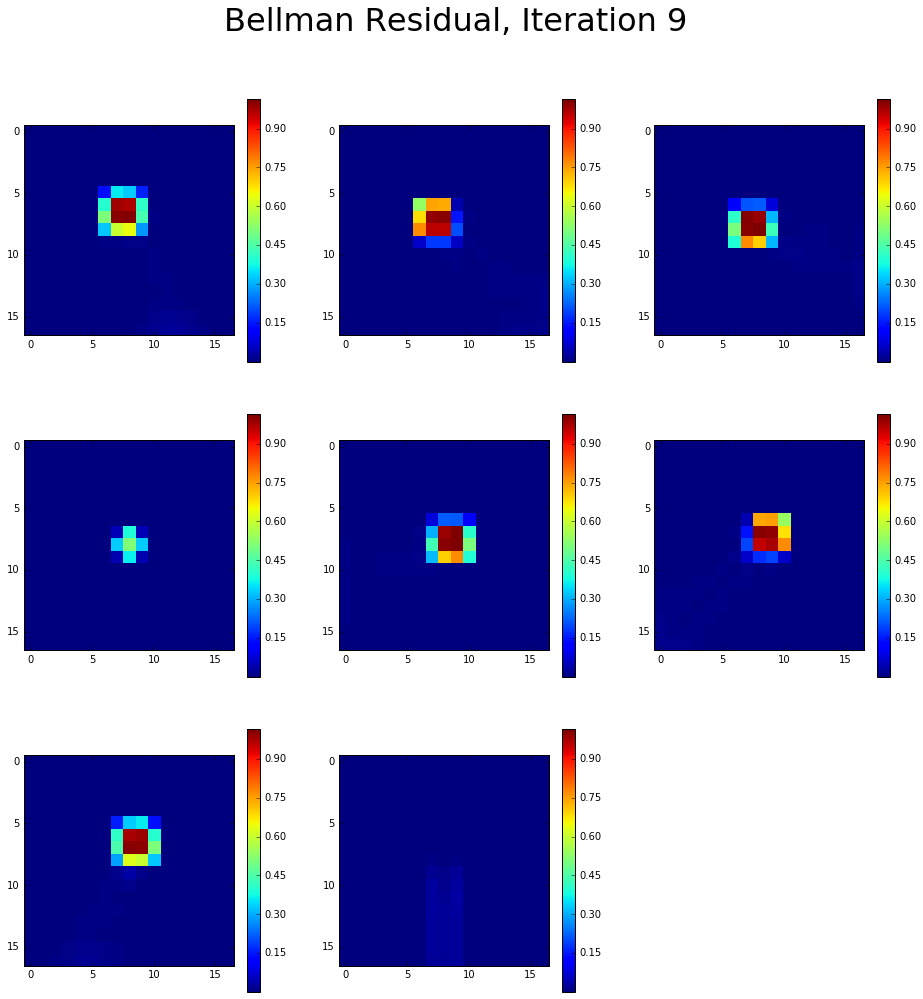

In [573]:
iter_slice = 9
plot_cube(np.reshape(np.abs(bellman[:-1, iter_slice]), (NXY,NXY,NT)))
plt.suptitle('Bellman Residual, Iteration {}'.format(iter_slice), fontsize=32)

(2601,)


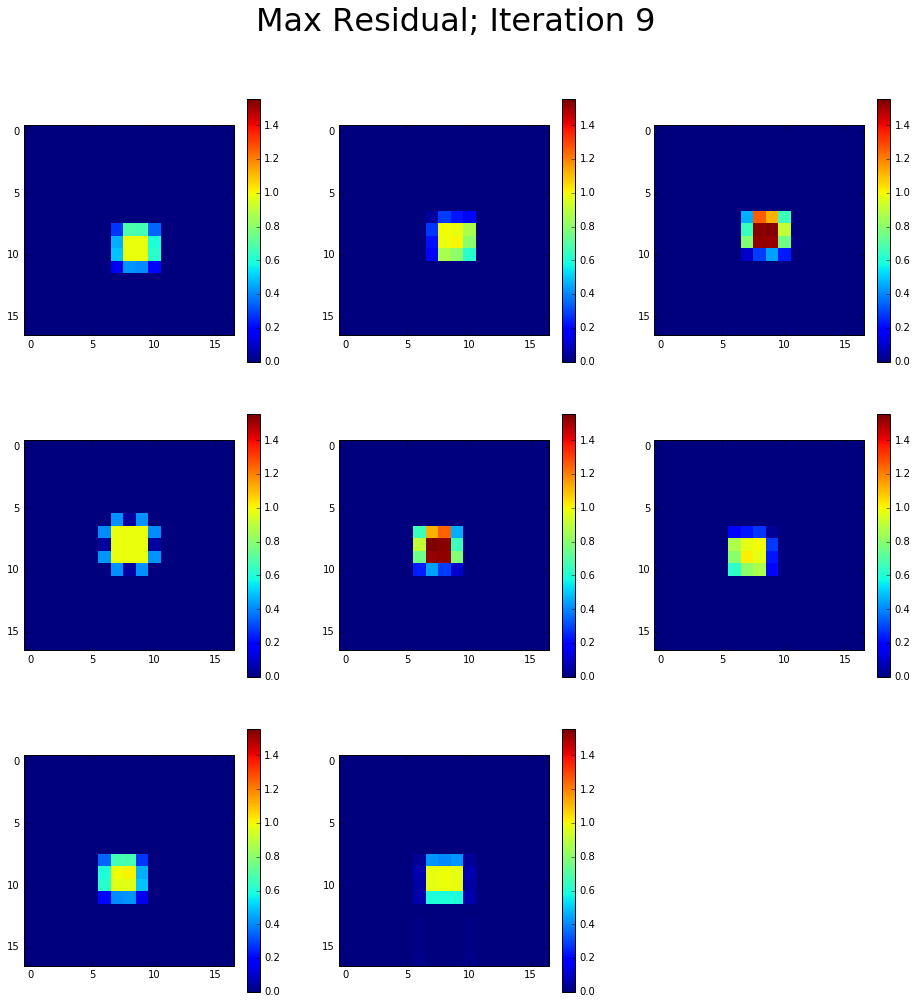

In [582]:
iter_slice = 9
max_res = np.abs(np.max(residuals[:-1,:,iter_slice], axis=1))
print(max_res.shape)
max_res = np.reshape(max_res, (NXY,NXY,NT))
plot_cube(max_res)
plt.suptitle('Max Residual; Iteration {}'.format(iter_slice), fontsize=32)

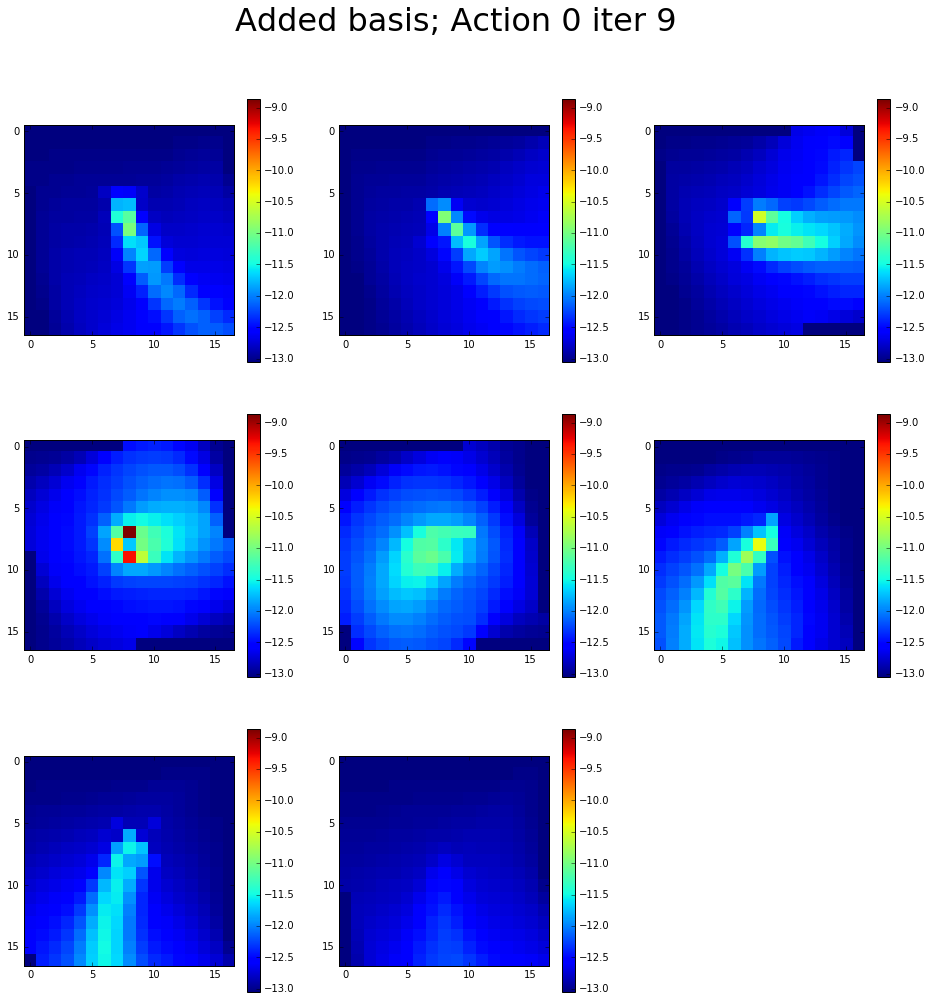

In [580]:
A = 0
I = 9
def get_basis(A, I):
    new_basis = basis[:, A, I]
    return np.reshape(new_basis[:-1], (NXY, NXY, NT))
new_basis = get_basis(A, I)
plot_cube(new_basis)
plt.suptitle('Added basis; Action {} iter {}'.format(A, I), fontsize=32)